In [57]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import count_nonzero

In [58]:
# Loading the data
titanic_data = pd.read_csv("train.csv")
pred_data = pd.read_csv("test.csv")

In [59]:
# Viewing the total number of rows and columns
titanic_data.shape

(891, 12)

In [60]:
# Viewing the first five rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# Checking te datatype of each column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# Some missing values are observed in the column age and cabin
# As the number of missing values in the cabin are more dropping the column
# Also the columns passengerid and name are irrelevant for building the model
# Dropping the columns
titanic_data.drop(columns=["Cabin","PassengerId","Name","Ticket"],inplace=True)

In [63]:
# Checking the number of datapoints in the taget variable
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [64]:
# The data seems to be reasonably balanced for building the model
input_feat= list(titanic_data.columns)
input_feat.remove("Survived")
num_feat = ["Age","Fare"]
cat_feat = ["Pclass","Sex","Parch","Embarked","SibSp"]
target_variable = "Survived"


In [65]:
# Class for EDA analysis
class EDA():
    def plot_count(self,feature_list,hue=None):
        for i in feature_list:
            plt.figure(figsize=(15,10))
            sns.countplot(x=i,hue=hue,data=titanic_data)
            plt.xlabel(i,fontsize=12)
            plt.ylabel("count",fontsize=12)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            if hue:
                plt.legend(fontsize=14)
            plt.show()
    def plot_bar_num(self,feature_list):
        for i in feature_list:
            plt.figure(figsize=(15,10))
            sns.barplot(x="Survived",y=i,data=titanic_data,ci=None)
            plt.xlabel("Survived",fontsize=12)
            plt.ylabel(i + " mean",fontsize=12)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.show()

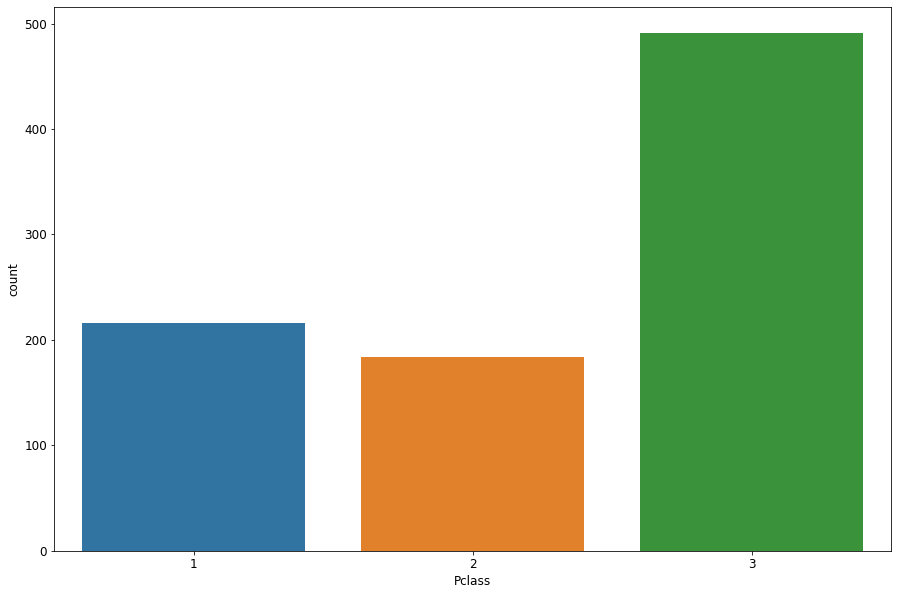

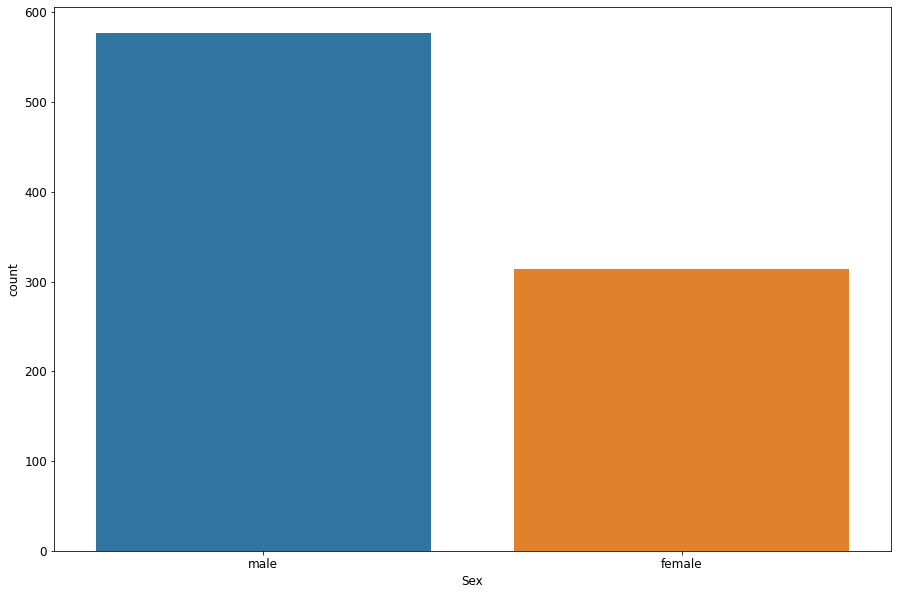

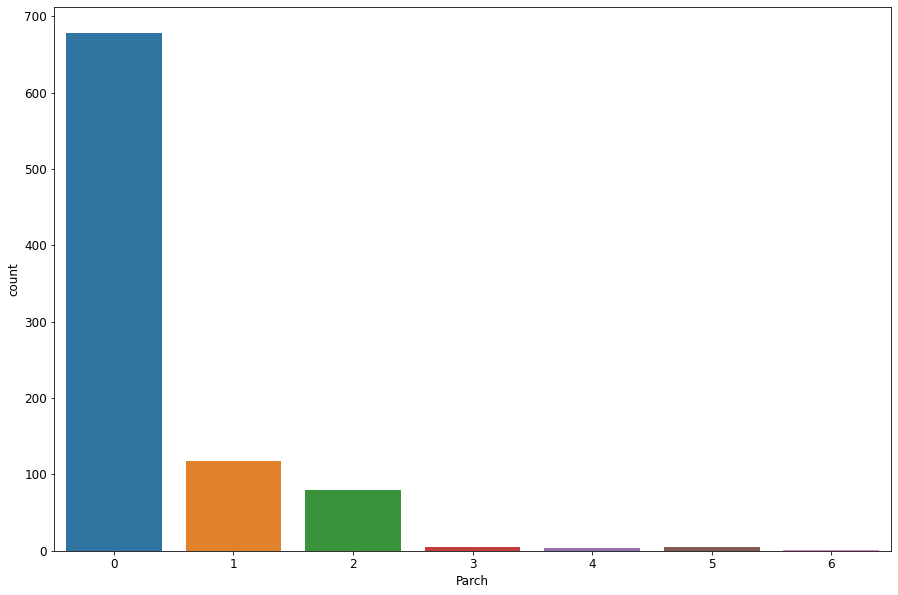

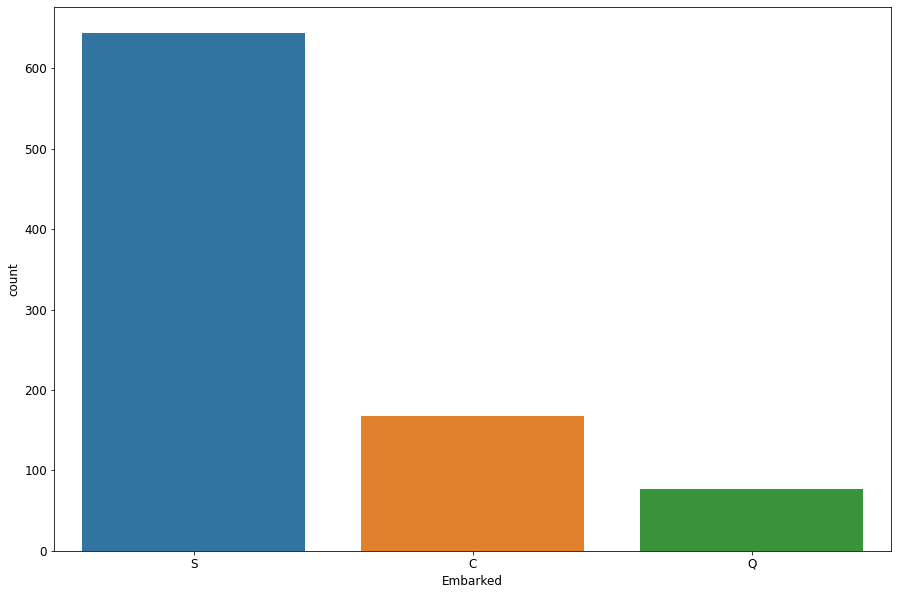

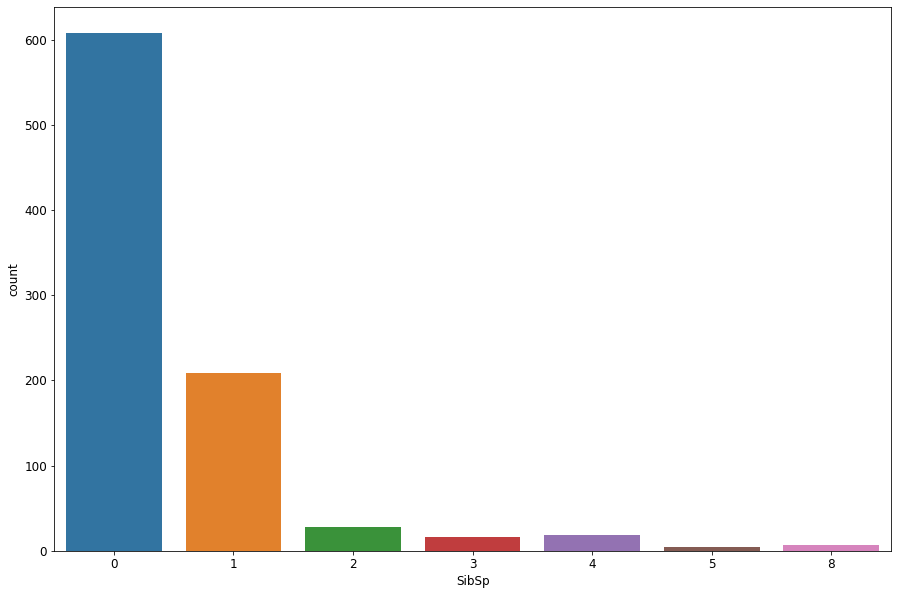

In [66]:
# EDA
# Univariate analysis
eda = EDA()
eda.plot_count(cat_feat)


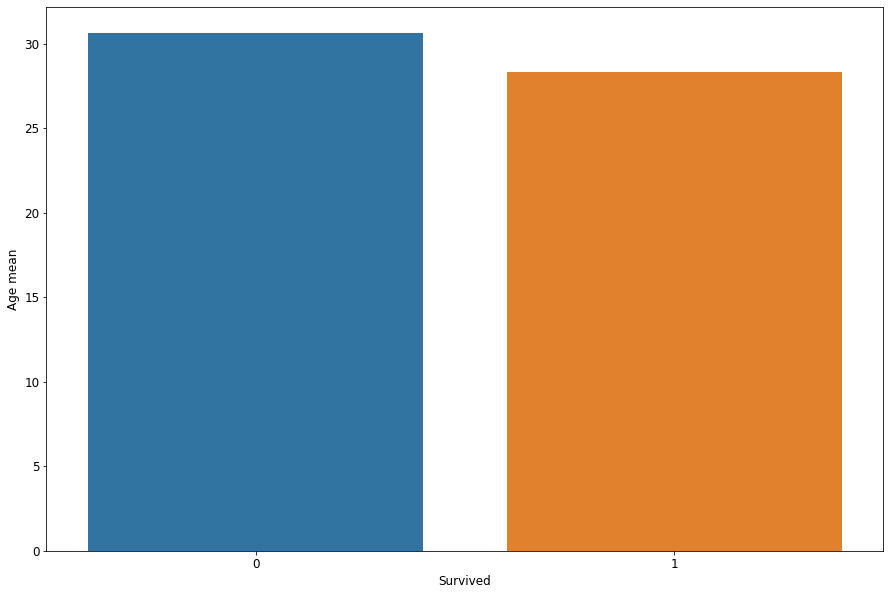

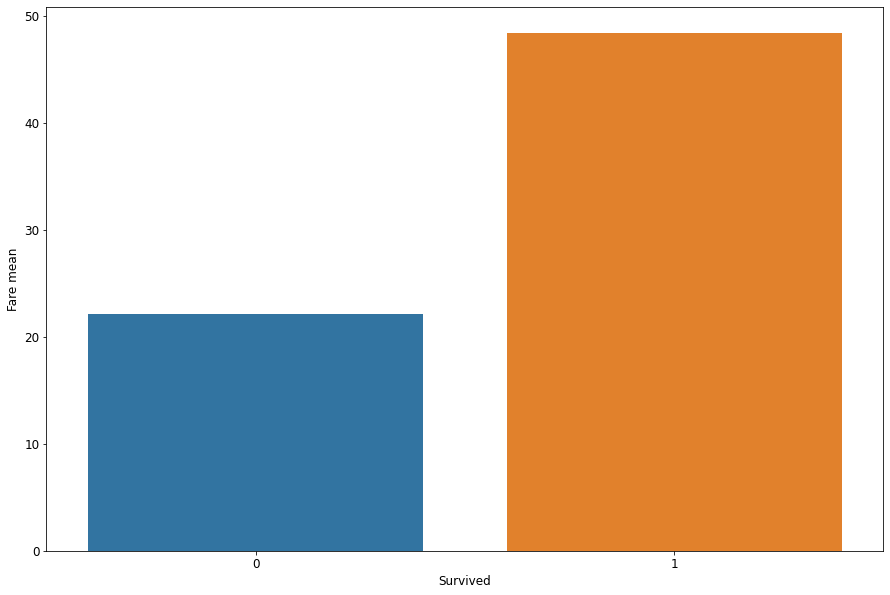

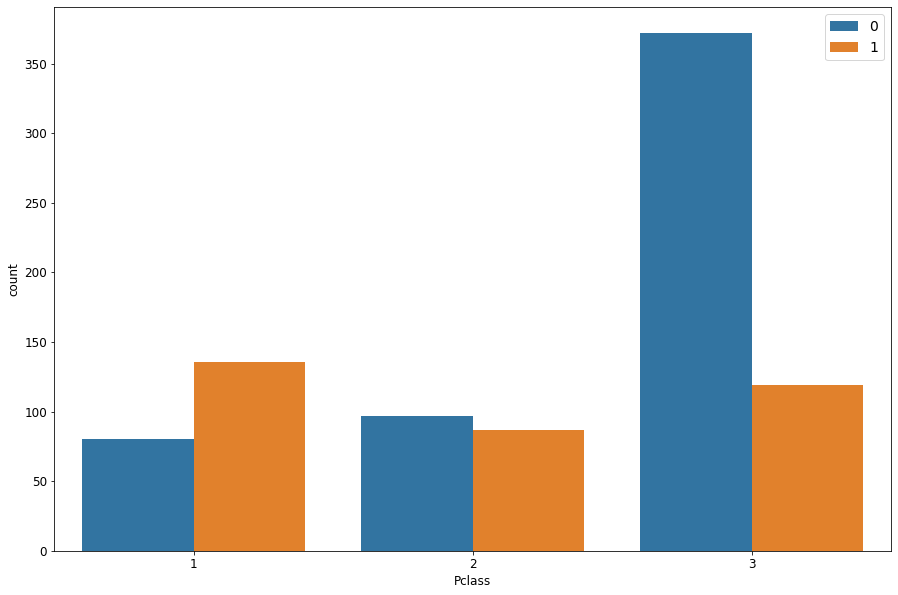

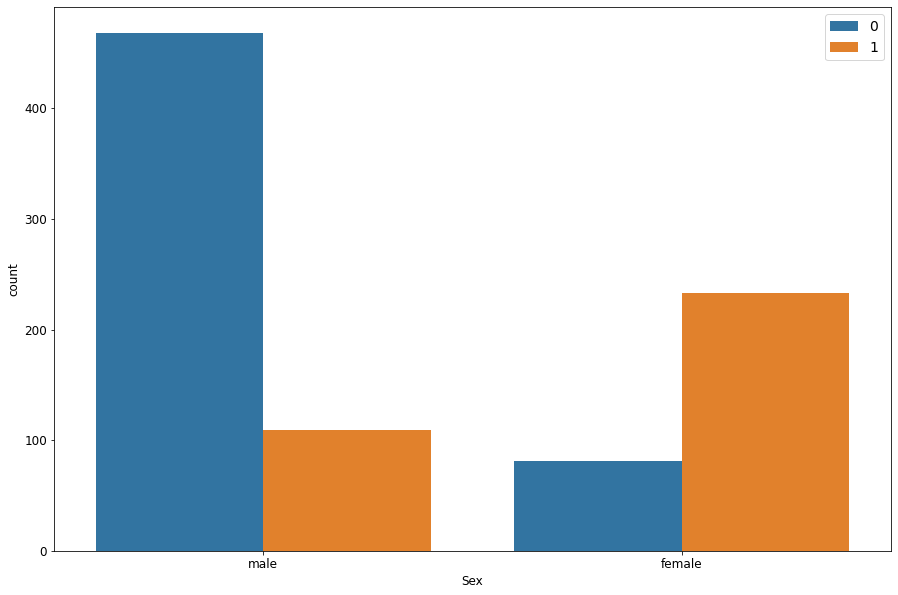

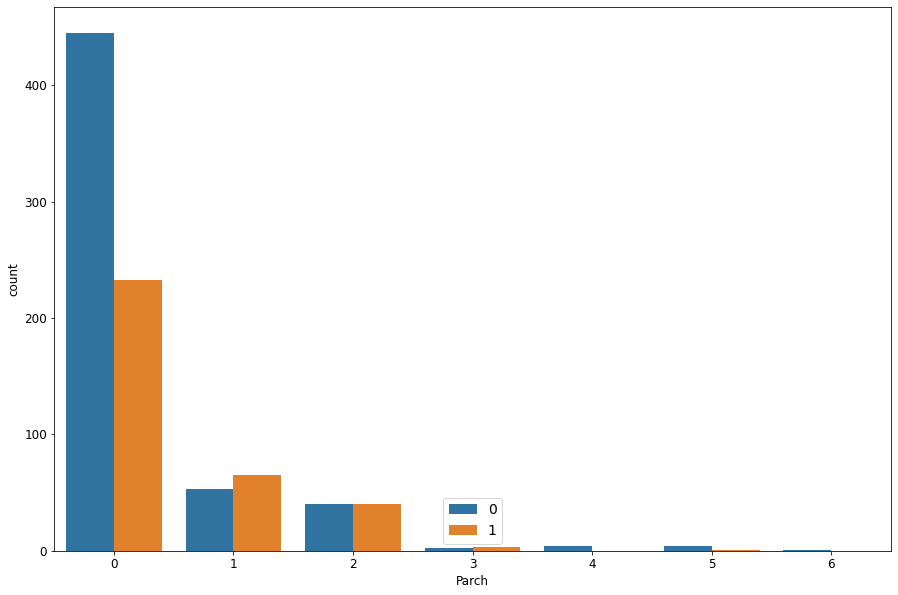

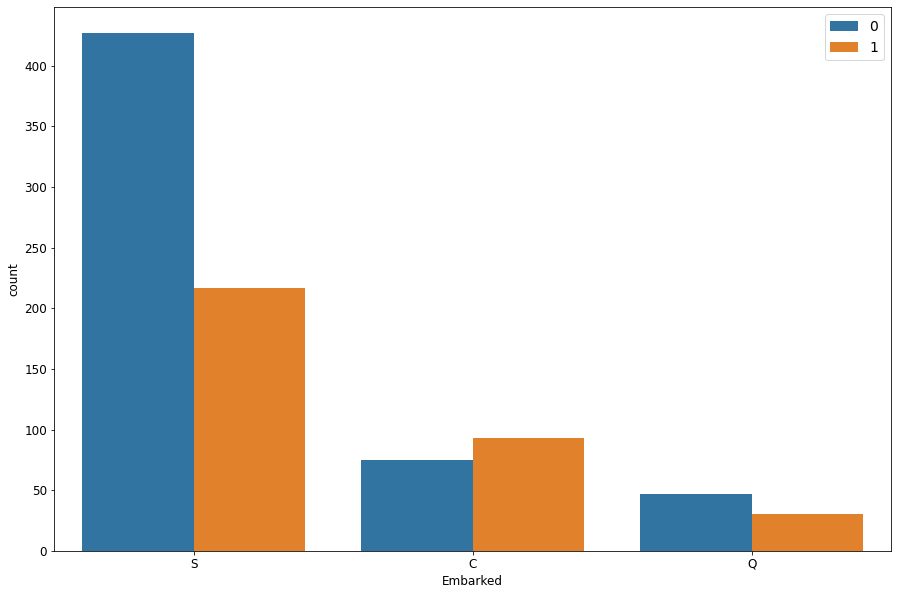

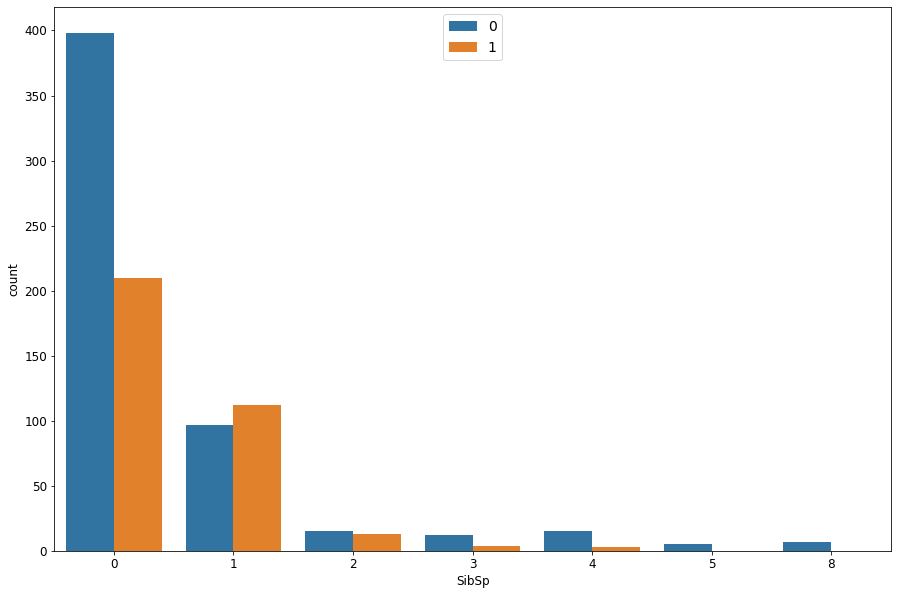

In [67]:
# Bivariate analysis
eda.plot_bar_num(num_feat)
eda.plot_count(cat_feat,"Survived")